In [2]:
using JSON
using PGFPlotsX
using PyCall
using Colors
using LaTeXStrings
using Glob
using Plots
np = pyimport("numpy")

function read_calcfile(dir::String)
    return JSON.parsefile(dir)
end
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colorbrewer}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{compat=1.16}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colormaps}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{
    colormap={cool}{rgb255(0cm)=(255,255,255); rgb255(1cm)=(0,128,255); rgb255(2cm)=(255,0,255)},
    colormap={greenyellow}{rgb255(0cm)=(0,128,0); rgb255(1cm)=(255,255,0)},
    colormap={mycool}{rgb255(0cm)=(0, 204, 255) 
                      rgb255(1cm)=(51, 204, 255)
                      rgb255(2cm)=(102, 153, 255)   
                      rgb255(3cm)=(153, 102, 255) 
                      rgb255(4cm)=(204, 51, 255) 
                      rgb255(5cm)=(255,0,255)},
colormap={blues}{
rgb255(0cm)=(197,218,238)
rgb255(1cm)=(147,196,222)
rgb255(2cm)=(90,163,207)
rgb255(3cm)=(45,125,187)
rgb255(4cm)=(12,87,160)
rgb255(5cm)=(8,48,107,)
},
colormap={reds}{
rgb255(0cm)=(252,186,160)
rgb255(1cm)=(251,138,106)
rgb255(2cm)=(246,87,62)
rgb255(3cm)=(216,37,34)
rgb255(4cm)=(172,16,22)
rgb255(5cm)=(103,0,12)
}
}")
push!(PGFPlotsX.CUSTOM_PREAMBLE,
raw"\pgfplotsset{
            legend image code/.code={
            \draw[mark repeat=2,mark phase=2]
            plot coordinates {
            (0cm,0cm)
            (0.2cm,0cm)        %% default is (0.3cm,0cm)
            (0.4cm,0cm)         %% default is (0.6cm,0cm)
            };%
            }}
");


# TDDFT

## With B3LYP


In [3]:
Glob.glob("../YAMBO/count-2/TDDFT-LRC/B3LYP/data-to-plot/o-ox-*.eps*")

6-element Vector{String}:
 "../YAMBO/count-2/TDDFT-LRC/B3LY" ⋯ 27 bytes ⋯ "yp-0.0_run.eps_q1_inv_LRC_dyson"
 "../YAMBO/count-2/TDDFT-LRC/B3LY" ⋯ 27 bytes ⋯ "yp-1.0_run.eps_q1_inv_LRC_dyson"
 "../YAMBO/count-2/TDDFT-LRC/B3LY" ⋯ 27 bytes ⋯ "yp-2.0_run.eps_q1_inv_LRC_dyson"
 "../YAMBO/count-2/TDDFT-LRC/B3LY" ⋯ 27 bytes ⋯ "yp-3.0_run.eps_q1_inv_LRC_dyson"
 "../YAMBO/count-2/TDDFT-LRC/B3LY" ⋯ 27 bytes ⋯ "yp-4.0_run.eps_q1_inv_LRC_dyson"
 "../YAMBO/count-2/TDDFT-LRC/B3LY" ⋯ 27 bytes ⋯ "yp-5.0_run.eps_q1_inv_LRC_dyson"

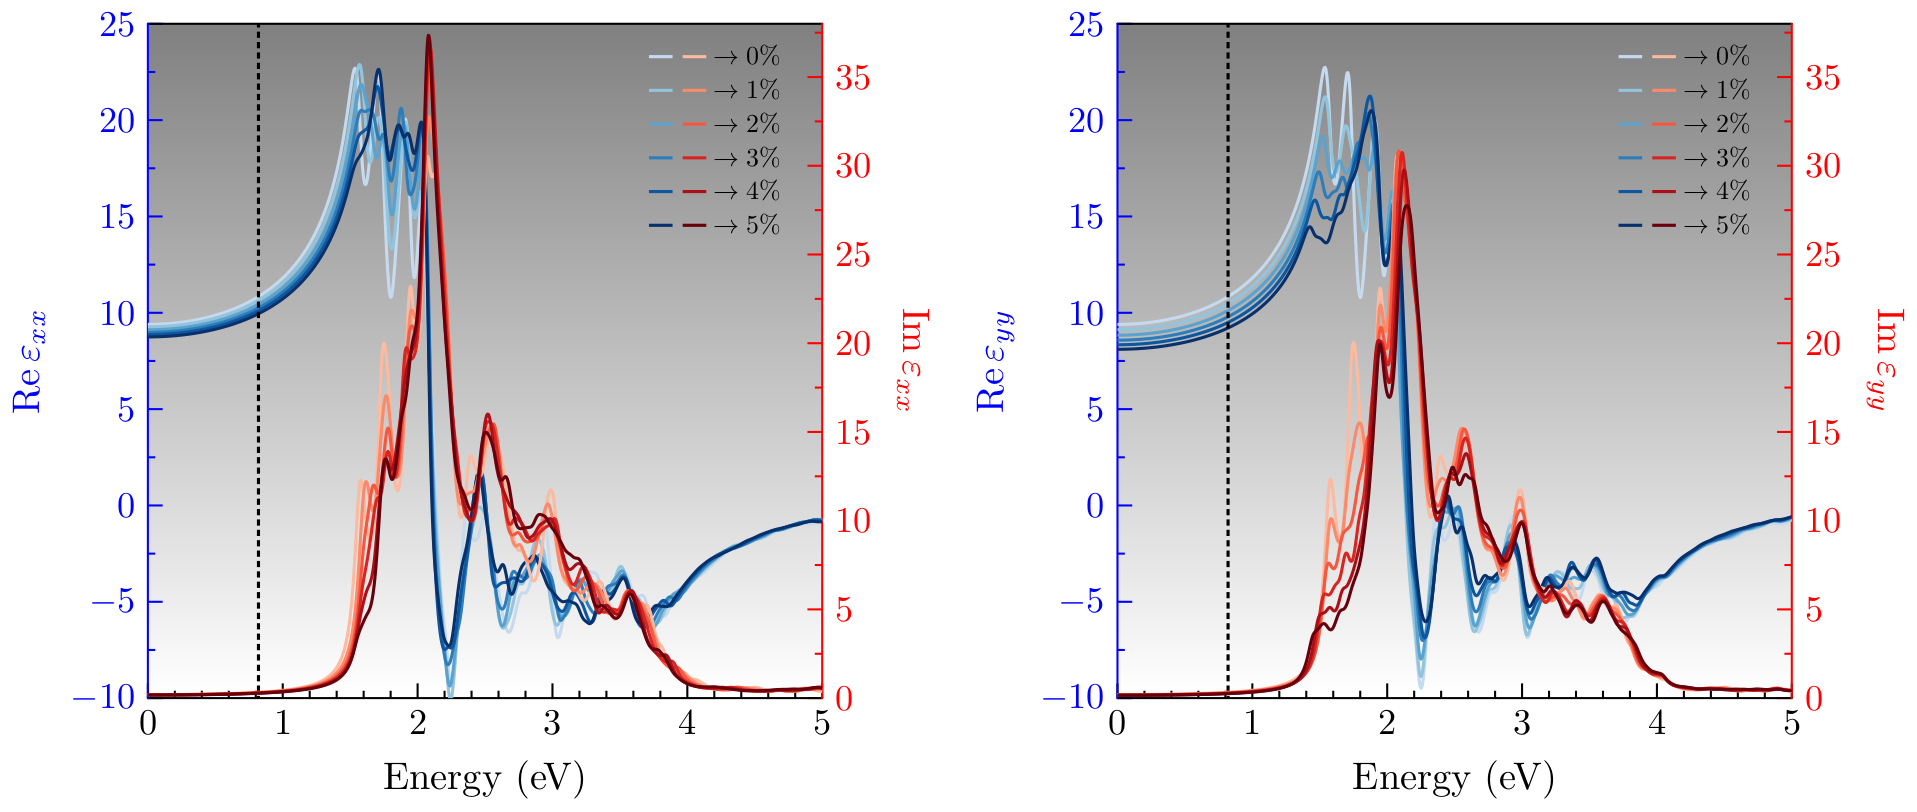

In [12]:
epsfx = Glob.glob("../YAMBO/count-2/TDDFT-LRC/B3LYP/data-to-plot/o-ox-*.eps*")
epsfy = Glob.glob("../YAMBO/count-2/TDDFT-LRC/B3LYP/data-to-plot/o-oy-*.eps*")

epsx_b3lyp = [np.loadtxt(i) for i in epsfx]
epsy_b3lyp = [np.loadtxt(i) for i in epsfy]
# epsxy = [np.loadtxt(i) for i in epsfxy]

tpy1 = @pgf TikzPicture({ })
eps_re = @pgf GroupPlot(
    {
        group_style =
        {
            group_size="2 by 1",
           "horizontal sep=50mm",
            },
        "width=13.0cm", "height=13cm",
        "scale only axis=false",
        xmin=0.0,xmax=5.0,
        ymin=-10,ymax=25.0,
        "major tick length = 2.5mm",
        "minor tick length = 1.25mm",
        "minor x tick num=4",
        "minor y tick num=1",
        "xtick pos=left",
        "xtick distance=1.0",
         "ytick distance=5.0",
        "x tick style={color=black,line width=1pt}",
        "x tick label style={scale=1.75}",
        "xlabel style={scale=1.85}",
        "xlabel={Energy (eV)}",
        "ytick pos=left",
        "axis y line*=left",
        "x tick label style={scale=1.75}",
        "y tick style={color=blue,line width=1pt}",
        "y tick label style={color=blue,scale=1.75}",
        "y axis line style={color=blue}",
        "ylabel style={scale=1.85,color=blue, at={(ticklabel cs:0.5)},anchor=south}",
        "every axis plot/.style={smooth,no marks,line width=1.5pt}",
        "axis line style={line width=1pt,line cap=round}",
        "legend columns=6",
        "transpose legend",   
        "set layers",   
        "title style={scale=2.5}",
        "title style={yshift=-1mm}"  
        },
    #----------------------------------------------Eps xx-----------------------------------------------------------
    {   "ylabel"=latexstring("{\\mathrm{Re}\\, \\varepsilon_{xx}}"),
        "cycle list={[of colormap=blues]}",
        "legend style={
        color=black,
            cells={anchor=center},
            inner xsep=1pt,
            inner ysep=1pt,
            nodes={scale=1.25,inner sep=2pt},
            draw=none,
            fill=none,
            at={(0.9,0.98)},
            anchor=north east}",
    },
    raw"\begin{pgfonlayer}{axis background}
    \fill[shade,color=gray,draw= white]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",
    [Plot(Table("x"=>epsx_b3lyp[i][:,1],"y"=>epsx_b3lyp[i][:,3])) for i in 1:length(epsfx)],
    [LegendEntry({opacity=0},latexstring("\\rightarrow $(i)\\%") ) for i in [0,1,2,3,4,5]],
    Plot({"forget plot,densely dashed"},Coordinates([(0.82,-300),(0.82,300)])),
    #-----------------------------------------------Eps yy -------------------------------------------------------

    {
        "ylabel"=latexstring("{\\mathrm{Re}\\, \\varepsilon_{yy}}"),
        "cycle list={[of colormap=blues]}",
        "legend style={
            color=black,
            cells={anchor=center},
            inner xsep=1pt,
            inner ysep=1pt,
            nodes={scale=1.25,inner sep=2pt},
            draw=none,
            fill=none,
            at={(0.9,0.98)},
            anchor=north east}",
    },
    raw"\begin{pgfonlayer}{axis background}
    \fill[shade,color=gray,draw= white]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",
    [Plot(Table("x"=>epsy_b3lyp[i][:,1],"y"=>epsy_b3lyp[i][:,3])) for i in 1:length(epsfy)],
    [LegendEntry({opacity=0},latexstring("\\rightarrow $(i)\\%") ) for i in [0,1,2,3,4,5]], 
     Plot({"forget plot,densely dashed"},Coordinates([(0.82,-300),(0.82,1000)])),

)


eps_im = @pgf GroupPlot(
    {
        group_style =
        {
            group_size="2 by 1",
           "horizontal sep=50mm",
            },
           "width=13.0cm", "height=13cm",
       "scale only axis=false",
        xmin=0.0,xmax=5.0,
        ymin=0,ymax=38.0,
        "major tick length = 2.5mm",
        "minor tick length = 1.25mm",
        "minor x tick num=4",
        "minor y tick num=1",
        "xtick=\\empty",
        "x axis line style={opacity=0}",
        "ytick distance=5.0",
        "ytick pos=right",
        "axis y line*=right",
        "x tick label style={scale=1.75}",
        "y tick style={color=red,line width=1pt}",
        "y tick label style={color=red,scale=1.75}",
        "y axis line style={color=red}",
        "ylabel style={scale=1.85,rotate=180,red, at={(ticklabel cs:0.5)},anchor=south}",
        "every axis plot/.style={smooth,no marks,line width=1.5pt}",
        "axis line style={line width=1pt,line cap=round}",
        "legend columns=6",
        "transpose legend",   
        "set layers",   
        "title style={scale=2.5}",
        "title style={yshift=-1mm}"  
        },
    #----------------------------------------------Eps xx-----------------------------------------------------------
    {   "ylabel"=latexstring("\\mathrm{Im}\\, \\varepsilon_{xx}"),
        "cycle list={[of colormap=reds]}",
        "legend style={
            color=black,
            cells={anchor=center},
            inner xsep=1pt,
            inner ysep=1pt,
            nodes={scale=1.25,inner sep=2pt},
            draw=none,
            fill=none,
            at={(0.95,0.98)},
            anchor=north east}",  
    },
    [Plot(Table("x"=>epsx_b3lyp[i][:,1],"y"=>epsx_b3lyp[i][:,2])) for i in 1:length(epsfx)],
    [LegendEntry(latexstring("\\rightarrow $(i)\\%") ) for i in [0,1,2,3,4,5]],

    #-----------------------------------------------Eps yy -------------------------------------------------------

    {
        "ylabel"=latexstring("\\mathrm{Im}\\, \\varepsilon_{yy}"),
        "cycle list={[of colormap=reds]}",
        "legend style={
            color=black,
            cells={anchor=center},
            inner xsep=1pt,
            inner ysep=1pt,
            nodes={scale=1.25,inner sep=2pt},
            draw=none,
            fill=none,
            at={(0.95,0.98)},
            anchor=north east}",
    },
    [Plot(Table("x"=>epsy_b3lyp[i][:,1],"y"=>epsy_b3lyp[i][:,2])) for i in 1:length(epsfy)],
    [LegendEntry(latexstring("\\rightarrow $(i)\\%") ) for i in [0,1,2,3,4,5]], 

)
push!(tpy1,eps_re)
push!(tpy1,eps_im)
#push!(tpy1,raw"\node[anchor=south west,scale=2,inner sep=1mm,xshift=-10mm] at (group c1r1.north west){TDDFT-LRC};")

display("image/png", tpy1)
#pgfsave("plots/epsilon_tddft_b3lyp.pdf",tpy1)

## With GAUPBE

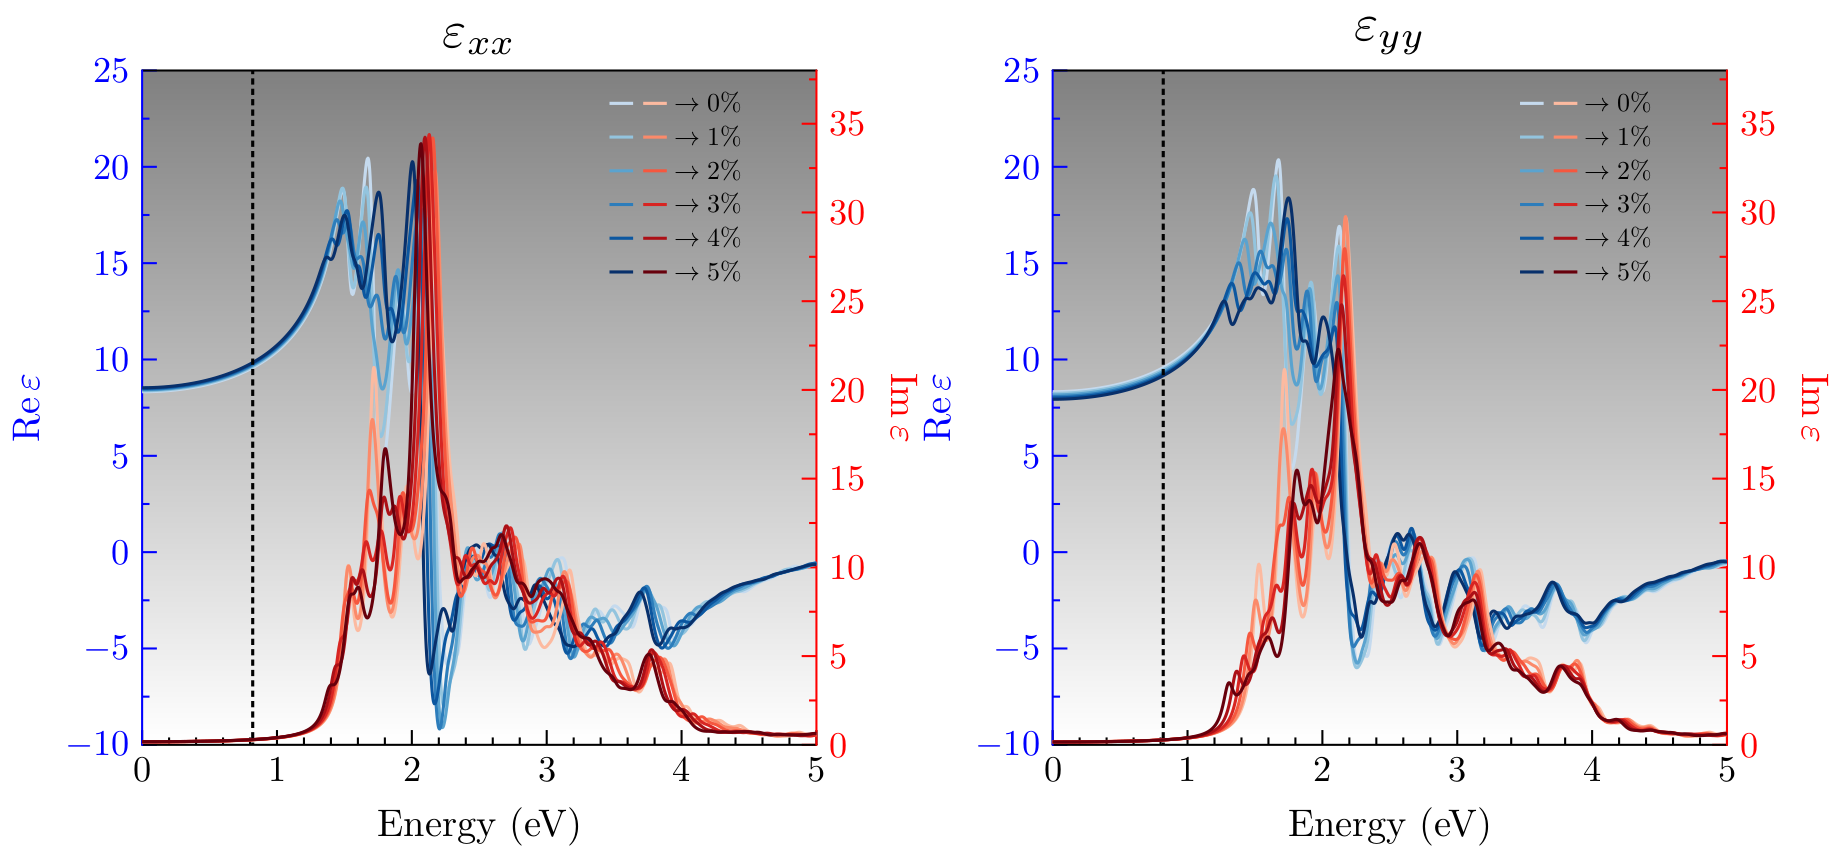

In [13]:
epsfx_gaup = Glob.glob("../YAMBO/count-2/TDDFT-LRC/Gau-PBE/data-to-plot/o-ox-*.eps*")
epsfy_gaup = Glob.glob("../YAMBO/count-2/TDDFT-LRC/Gau-PBE/data-to-plot/o-oy-*.eps*")

epsx_gaup = [np.loadtxt(i) for i in epsfx_gaup]
epsy_gaup = [np.loadtxt(i) for i in epsfy_gaup]
# epsxy = [np.loadtxt(i) for i in epsfxy]

tpy1 = @pgf TikzPicture({ })
eps_re = @pgf GroupPlot(
    {
        group_style =
        {
            group_size="2 by 1",
           "horizontal sep=40mm",
            },
        "width=13.0cm", "height=13cm",
        "scale only axis=false",
        xmin=0.0,xmax=5.0,
        ymin=-10,ymax=25.0,
        "major tick length = 2.5mm",
        "minor tick length = 1.25mm",
        "minor x tick num=4",
        "minor y tick num=1",
        "xtick pos=left",
        "xtick distance=1.0",
         "ytick distance=5.0",
        "x tick style={color=black,line width=1pt}",
        "x tick label style={scale=1.75}",
        "xlabel style={scale=1.85}",
        "xlabel={Energy (eV)}",
        "ytick pos=left",
        "axis y line*=left",
        "x tick label style={scale=1.75}",
        "y tick style={color=blue,line width=1pt}",
        "y tick label style={color=blue,scale=1.75}",
        "y axis line style={color=blue}",
        "ylabel style={scale=1.85,color=blue, at={(ticklabel cs:0.5)},anchor=south}",
        "every axis plot/.style={smooth,no marks,line width=1.5pt}",
        "axis line style={line width=1pt,line cap=round}",
        "legend columns=6",
        "transpose legend",   
        "set layers",   
        "title style={scale=2.5}",
        "title style={yshift=-1mm}"  
        },
    #----------------------------------------------Eps xx-----------------------------------------------------------
    {   "ylabel"=latexstring("{\\mathrm{Re}\\, \\varepsilon}"),
        "cycle list={[of colormap=blues]}",
        "legend style={
        color=black,
            cells={anchor=center},
            inner xsep=1pt,
            inner ysep=1pt,
            nodes={scale=1.25,inner sep=2pt},
            draw=none,
            fill=none,
            at={(0.85,0.98)},
            anchor=north east}",
            "title"=latexstring("{\\varepsilon_{xx}}")
    },
    raw"\begin{pgfonlayer}{axis background}
    \fill[shade,color=gray,draw= white]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",
    [Plot(Table("x"=>epsx_gaup[i][:,1],"y"=>epsx_gaup[i][:,3])) for i in 1:length(epsfx_gaup)],
    [LegendEntry({opacity=0},latexstring("\\rightarrow $(i)\\%") ) for i in [0,1,2,3,4,5]],
    Plot({"forget plot,densely dashed"},Coordinates([(0.82,-300),(0.82,300)])),
    #-----------------------------------------------Eps yy -------------------------------------------------------

    {
        "ylabel"=latexstring("{\\mathrm{Re}\\, \\varepsilon}"),
        "cycle list={[of colormap=blues]}",
        "legend style={
            color=black,
            cells={anchor=center},
            inner xsep=1pt,
            inner ysep=1pt,
            nodes={scale=1.25,inner sep=2pt},
            draw=none,
            fill=none,
            at={(0.85,0.98)},
            anchor=north east}",
            "title"=latexstring("{\\varepsilon_{yy}}")
    },
    raw"\begin{pgfonlayer}{axis background}
    \fill[shade,color=gray,draw= white]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",
    [Plot(Table("x"=>epsy_gaup[i][:,1],"y"=>epsy_gaup[i][:,3])) for i in 1:length(epsfy_gaup)],
    [LegendEntry({opacity=0},latexstring("\\rightarrow $(i)\\%") ) for i in [0,1,2,3,4,5]], 
     Plot({"forget plot,densely dashed"},Coordinates([(0.82,-300),(0.82,1000)])),

)


eps_im = @pgf GroupPlot(
    {
        group_style =
        {
            group_size="2 by 1",
           "horizontal sep=40mm",
            },
           "width=13.0cm", "height=13cm",
       "scale only axis=false",
        xmin=0.0,xmax=5.0,
        ymin=0,ymax=38.0,
        "major tick length = 2.5mm",
        "minor tick length = 1.25mm",
        "minor x tick num=4",
        "minor y tick num=1",
        "xtick=\\empty",
        "x axis line style={opacity=0}",
        "ytick distance=5.0",
        "ytick pos=right",
        "axis y line*=right",
        "x tick label style={scale=1.75}",
        "y tick style={color=red,line width=1pt}",
        "y tick label style={color=red,scale=1.75}",
        "y axis line style={color=red}",
        "ylabel style={scale=1.85,rotate=180,red, at={(ticklabel cs:0.5)},anchor=south}",
        "every axis plot/.style={smooth,no marks,line width=1.5pt}",
        "axis line style={line width=1pt,line cap=round}",
        "legend columns=6",
        "transpose legend",   
        "set layers",   
        "title style={scale=2.5}",
        "title style={yshift=-1mm}"  
        },
    #----------------------------------------------Eps xx-----------------------------------------------------------
    {   "ylabel"=latexstring("\\mathrm{Im}\\, \\varepsilon"),
        "cycle list={[of colormap=reds]}",
        "legend style={
            color=black,
            cells={anchor=center},
            inner xsep=1pt,
            inner ysep=1pt,
            nodes={scale=1.25,inner sep=2pt},
            draw=none,
            fill=none,
            at={(0.9,0.98)},
            anchor=north east}",  
    },
    [Plot(Table("x"=>epsx_gaup[i][:,1],"y"=>epsx_gaup[i][:,2])) for i in 1:length(epsfx_gaup)],
    [LegendEntry(latexstring("\\rightarrow $(i)\\%") ) for i in [0,1,2,3,4,5]],

    #-----------------------------------------------Eps yy -------------------------------------------------------

    {
        "ylabel"=latexstring("\\mathrm{Im}\\, \\varepsilon"),
        "cycle list={[of colormap=reds]}",
        "legend style={
            color=black,
            cells={anchor=center},
            inner xsep=1pt,
            inner ysep=1pt,
            nodes={scale=1.25,inner sep=2pt},
            draw=none,
            fill=none,
            at={(0.9,0.98)},
            anchor=north east}",
    },
    [Plot(Table("x"=>epsy_gaup[i][:,1],"y"=>epsy_gaup[i][:,2])) for i in 1:length(epsfy_gaup)],
    [LegendEntry(latexstring("\\rightarrow $(i)\\%") ) for i in [0,1,2,3,4,5]], 

)
push!(tpy1,eps_re)
push!(tpy1,eps_im)
#push!(tpy1,raw"\node[anchor=south west,scale=2,inner sep=1mm,xshift=-10mm] at (group c1r1.north west){TDDFT-LRC};")

display("image/png", tpy1)
# pgfsave("plots/epsilon_tddft_gaup.pdf",tpy1)

# Combination of B3LYP and Gau-PBE

In [4]:
#----b3lyp
epsfx_b3lyp = Glob.glob("../YAMBO/count-2/TDDFT-LRC/B3LYP/data-to-plot/o-ox-*.eps*")
epsfy_b3lyp = Glob.glob("../YAMBO/count-2/TDDFT-LRC/B3LYP/data-to-plot/o-oy-*.eps*")
epsx_b3lyp = [np.loadtxt(i) for i in epsfx_b3lyp]
epsy_b3lyp = [np.loadtxt(i) for i in epsfy_b3lyp]

#----gaup
epsfx_gaup = Glob.glob("../YAMBO/count-2/TDDFT-LRC/Gau-PBE/data-to-plot/o-ox-*.eps*")
epsfy_gaup = Glob.glob("../YAMBO/count-2/TDDFT-LRC/Gau-PBE/data-to-plot/o-oy-*.eps*")
epsx_gaup = [np.loadtxt(i) for i in epsfx_gaup]
epsy_gaup = [np.loadtxt(i) for i in epsfy_gaup]

6-element Vector{Matrix{Float64}}:
 [0.0 0.167499 … 0.138036 7.849465; 0.003333 0.1675 … 0.138037 7.849479; … ; 4.996667 0.589326 … 0.727121 -0.471771; 5.0 0.587734 … 0.727747 -0.469729]
 [0.0 0.165253 … 0.136878 7.787685; 0.003333 0.165254 … 0.136879 7.787698; … ; 4.996667 0.570304 … 0.721048 -0.411726; 5.0 0.571353 … 0.723554 -0.409237]
 [0.0 0.163322 … 0.135922 7.730556; 0.003333 0.163323 … 0.135923 7.730569; … ; 4.996667 0.573983 … 0.733625 -0.346558; 5.0 0.578748 … 0.739623 -0.346344]
 [0.0 0.161293 … 0.134897 7.669742; 0.003333 0.161295 … 0.134898 7.669755; … ; 4.996667 0.618625 … 0.790999 -0.33163; 5.0 0.623009 … 0.792425 -0.338078]
 [0.0 0.159864 … 0.134216 7.6181; 0.003333 0.159865 … 0.134217 7.618114; … ; 4.996667 0.655099 … 0.8041 -0.385721; 5.0 0.652326 … 0.797537 -0.389533]
 [0.0 0.158438 … 0.133533 7.564604; 0.003333 0.158439 … 0.133534 7.564618; … ; 4.996667 0.608148 … 0.74691 -0.403189; 5.0 0.602355 … 0.738068 -0.401812]

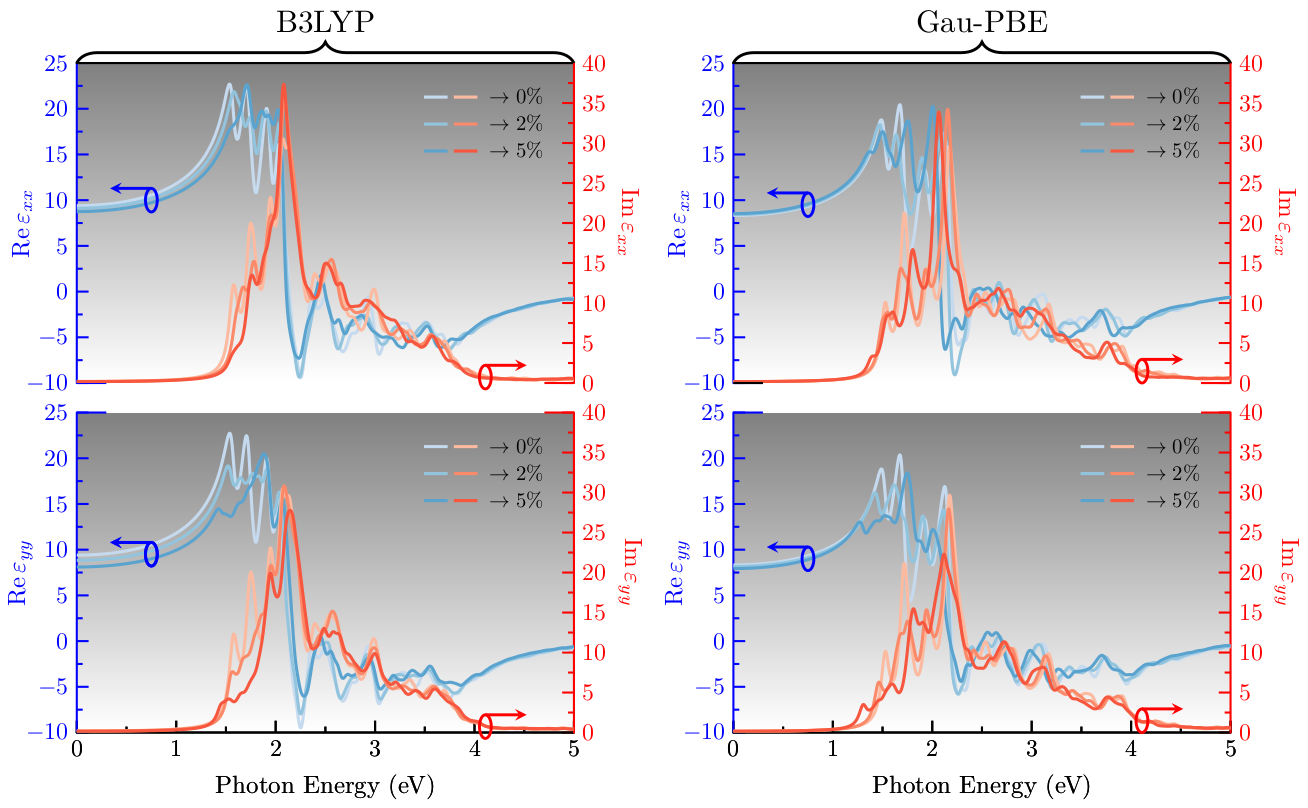

In [7]:
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colorbrewer}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{compat=1.16}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colormaps}")

push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{colormap/GnBu-7} ")
push!(PGFPlotsX.CUSTOM_PREAMBLE,raw"\pgfplotsset{
legend image code/.code={
\draw[mark repeat=2,mark phase=2]
plot coordinates {
(0cm,0cm)
(0.1cm,0cm)        %% default is (0.4cm,0cm)
(0.4cm,0cm)         %% default is (0.8cm,0cm)
};%
}
}")

tp = @pgf TikzPicture({ })
@pgf xx = GroupPlot(
    {
        group_style =
        {
            group_size="2 by 2",
            "vertical sep=5mm",
            "horizontal sep=27mm",
            "xticklabels at=edge bottom",
            },
        #"scale only axis",
        "width=10.0cm", "height=7.0cm",
        xmin=0.0,xmax=5.0,
        ymin=-10,ymax=25.0,
        "major tick length = 2mm",
        "minor tick length = 1mm",
        "minor x tick num=1",
        "minor y tick num=1",
        "xtick distance=1.0",
        "ytick distance=5.0",
        "ylabel style={scale=1.2,color=blue,at={(rel axis cs:-0.07,0.5)}}",
        "xlabel style={scale=1.2}",
        "every axis plot/.style={smooth,no marks,line width=1.5pt}",
        "every axis/.append style={line width=1.0pt,tick style = {line width=1pt,black},ticklabel style={scale=1.15}}",
        "axis line style={line width=1pt,line cap=round}",
        "ytick pos=left",
        "ytick pos=left",
        "axis y line*=left",
        "y tick style={color=blue,line width=1pt}",
        "y tick label style={color=blue}",
        "y axis line style={color=blue}",
        "legend columns=6",
        "transpose legend",
        "legend style={
          cells={anchor=west},
          nodes={scale=1},
          draw=none,
          fill=none,
          at={(0.9,0.95)},
          anchor=north east}",
        "legend style={column sep=1mm}",
        "set layers",   
        },
#-----------------------------------------------------Re epsxx b3lyp---------------------------------------------------------

{  
"ylabel"=latexstring("{\\mathrm{Re}\\, \\varepsilon_{xx}}"),
"axis x line*=top",
"xtick=\\empty",
raw"after end axis/.code={
\draw[blue] (rel axis cs:0,0) +(0mm,0mm) -- +(5mm,0mm);
\draw[red]  (rel axis cs:1,0) +(0mm,0mm) -- +(-5mm,0mm);
},",    
"cycle list={[of colormap=blues]}",     
},
raw"\begin{pgfonlayer}{axis background}
\fill[shade,color=gray,draw= white]
(rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
\end{pgfonlayer} ",
[Plot(Table("x"=>epsx_b3lyp[i][:,1],"y"=>epsx_b3lyp[i][:,3])) for i in [1,3,6]],
[LegendEntry({opacity=0},latexstring("\\rightarrow $(i)\\%") ) for i in [0,2,5]],
raw"\coordinate (blue1) at (axis cs: 0.75,10);",
#-----------------------------------------------------Re epsxx gaup---------------------------------------------------------

{  
"axis x line*=top",
"xtick=\\empty",
"ylabel"=latexstring("{\\mathrm{Re}\\, \\varepsilon_{xx}}"),
raw"after end axis/.code={
\draw[blue] (rel axis cs:0,0) +(0mm,0mm) -- +(5mm,0mm);
\draw[red]  (rel axis cs:1,0) +(0mm,0mm) -- +(-5mm,0mm);
},",      
"cycle list={[of colormap=blues]}", 
},
  raw"\begin{pgfonlayer}{axis background}
  \fill[shade,color=gray,draw= white]
    (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
  \end{pgfonlayer} ",

[Plot(Table("x"=>epsx_gaup[i][:,1],"y"=>epsx_gaup[i][:,3])) for i in [1,3,6]],
[LegendEntry({opacity=0},latexstring("\\rightarrow $(i)\\%") ) for i in [0,2,5]],
raw"\coordinate (blue2) at (axis cs: 0.75,9.5);",


#-----------------------------------------------------Re epsyy b3lyp---------------------------------------------------------

{
"xlabel={Photon Energy (eV)}",
"axis x line*=bottom", 
"ylabel"=latexstring("{\\mathrm{Re}\\, \\varepsilon_{yy}}"),
"cycle list={[of colormap=blues]}",     
    },
    raw"\begin{pgfonlayer}{axis background}
    \fill[shade,color=gray,draw= white]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",

[Plot(Table("x"=>epsy_b3lyp[i][:,1],"y"=>epsy_b3lyp[i][:,3])) for i in [1,3,6]],
[LegendEntry({opacity=0},latexstring("\\rightarrow $(i)\\%") ) for i in [0,2,5]],
raw"\coordinate (blue3) at (axis cs: 0.75,9.5);",

#-----------------------------------------------------Re epsyy gaup ---------------------------------------------------------
{
"xlabel={Photon Energy (eV)}",
"axis x line*=bottom",        
"ylabel"=latexstring("{\\mathrm{Re}\\, \\varepsilon_{yy}}"),
              "cycle list={[of colormap=blues]}",     
  },
raw"\begin{pgfonlayer}{axis background}
\fill[shade,color=gray,draw= white]
  (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
\end{pgfonlayer} ",
[Plot(Table("x"=>epsy_gaup[i][:,1],"y"=>epsy_gaup[i][:,3])) for i in [1,3,6]],
[LegendEntry({opacity=0},latexstring("\\rightarrow $(i)\\%") ) for i in [0,2,5]],
raw"\coordinate (blue4) at (axis cs: 0.75,9);",

#---------------------------------------------- ------------------------------------------------------
)

#=================================================== Imaginary DF ===================================#

@pgf yy = GroupPlot(
    {
        group_style =
        {
            group_size="2 by 2",
            "vertical sep=5mm",
            "horizontal sep=27mm",
            "xticklabels at=edge bottom",
            },
        #"scale only axis",
        "width=10.0cm", "height=7.0cm",
        xmin=0.0,xmax=5.0,
        ymin=0,ymax=40.0,
        "major tick length = 2mm",
        "minor tick length = 1mm",
        "minor x tick num=1",
        "minor y tick num=1",
        "xtick distance=1.0",
        "ytick distance=5.0",
        "ylabel style={scale=1.2,color=red,at={(rel axis cs:1.07,0.5)},rotate=180}",
        "xlabel style={scale=1.2}",
        "every axis plot/.style={smooth,no marks,line width=1.5pt}",
        "every axis/.append style={line width=1.0pt,tick style = {line width=1pt,black},ticklabel style={scale=1.15}}",
        "axis line style={line width=1pt,line cap=round}",
        "ytick pos=right",
        "axis y line*=right",
        "y tick style={color=red,line width=1pt}",
        "y tick label style={color=red}",
        "y axis line style={color=red}",
        "legend columns=6",
        "transpose legend",
        "legend style={
          cells={anchor=west},
          nodes={scale=1},
          draw=none,
          fill=none,
          at={(0.96,0.95)},
          anchor=north east}",
        "legend style={column sep=1mm}",
        "set layers",   
        },
#-----------------------------------------------------Im epsxx b3lyp --------------------------------------------------------
    {  
"ylabel"=latexstring("{\\mathrm{Im}\\, \\varepsilon_{xx}}"),
"axis x line*=top",
"xtick=\\empty",
"cycle list={[of colormap=reds]}", 
},
raw"\begin{pgfonlayer}{axis background}
\fill[shade,color=gray,draw= white]
(rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
\end{pgfonlayer} ",
[Plot(Table("x"=>epsx_b3lyp[i][:,1],"y"=>epsx_b3lyp[i][:,2])) for i in [1,3,6]],
[LegendEntry(latexstring("\\rightarrow $(i)\\%") ) for i in [0,2,5]],

#-----------------------------------------------------Im epsxx guap --------------------------------------------------------
{  
"axis x line*=top",
"xtick=\\empty",
"ylabel"=latexstring("{\\mathrm{Im}\\, \\varepsilon_{xx}}"),
raw"after end axis/.code={
            \draw (rel axis cs:0,0) +(0mm,0mm) -- +(5mm,0mm);
            \draw[red] (rel axis cs:1,0) +(0mm,0mm) -- +(-5mm,0mm);
            },",    
"cycle list={[of colormap=reds]}", 
},
  raw"\begin{pgfonlayer}{axis background}
  \fill[shade,color=gray,draw= white]
    (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
  \end{pgfonlayer} ",

[Plot(Table("x"=>epsx_gaup[i][:,1],"y"=>epsx_gaup[i][:,2])) for i in [1,3,6]],
[LegendEntry(latexstring("\\rightarrow $(i)\\%") ) for i in [0,2,5]],

#-----------------------------------------------------Im epsyy b3lyp --------------------------------------------------------

{
"xlabel={Photon Energy (eV)}",
"axis x line*=bottom", 
"ylabel"=latexstring("{\\mathrm{Im}\\, \\varepsilon_{yy}}"),
raw"after end axis/.code={
\draw[blue] (rel axis cs:0,1) +(0mm,0mm) -- +(5mm,0mm);
\draw[red]  (rel axis cs:1,1) +(0mm,0mm) -- +(-5mm,0mm);
},",    
"cycle list={[of colormap=reds]}",     
    },
    raw"\begin{pgfonlayer}{axis background}
    \fill[shade,color=gray,draw= white]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",

[Plot(Table("x"=>epsy_b3lyp[i][:,1],"y"=>epsy_b3lyp[i][:,2])) for i in [1,3,6]],
[LegendEntry(latexstring("\\rightarrow $(i)\\%") ) for i in [0,2,5]],

#-----------------------------------------------------Im epsxx gaup --------------------------------------------------------

{
"xlabel={Photon Energy (eV)}",
"axis x line*=bottom",        
"ylabel"=latexstring("{\\mathrm{Im}\\, \\varepsilon_{yy}}"),
raw"after end axis/.code={
\draw[blue] (rel axis cs:0,1) +(0mm,0mm) -- +(5mm,0mm);
\draw[red]  (rel axis cs:1,1) +(0mm,0mm) -- +(-5mm,0mm);
},",     
"cycle list={[of colormap=reds]}",     
 },
raw"\begin{pgfonlayer}{axis background}
\fill[shade,color=gray,draw= white]
  (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
\end{pgfonlayer} ",
[Plot(Table("x"=>epsy_gaup[i][:,1],"y"=>epsy_gaup[i][:,2])) for i in [1,3,6]],
[LegendEntry(latexstring("\\rightarrow $(i)\\%") ) for i in [0,2,5]],

#---------------------------------------------- ------------------------------------------------------
)


push!(tp,xx)
push!(tp,yy)
push!(tp,raw"\draw[decorate,decoration={brace,amplitude=10pt},line width=0.5mm](group c1r1.north west) -- (group c1r1.north east) node [midway,xshift=0.0,yshift=7mm,scale=1.5] {B3LYP};")
push!(tp,raw"\draw[decorate,decoration={brace,amplitude=10pt},line width=0.5mm](group c2r1.north west) -- (group c2r1.north east) node [midway,xshift=0.0,yshift=7mm,scale=1.5] {Gau-PBE};")
#---------- draw red arrows to indicate the direction of the polarization -------------------
push!(tp,raw"\draw[line width=0.5mm,red] ([xshift=-15mm,yshift=1mm]group c1r1.south east) ellipse (1.0mm and 2mm);")
push!(tp,raw"\draw[line width=0.5mm,red,-{stealth}] ([xshift=-15mm,yshift=3mm]group c1r1.south east) --++ (7mm,0);")
push!(tp,raw"\draw[line width=0.5mm,red] ([xshift=-15mm,yshift=1mm]group c1r2.south east) ellipse (1.0mm and 2mm);")
push!(tp,raw"\draw[line width=0.5mm,red,-{stealth}] ([xshift=-15mm,yshift=3mm]group c1r2.south east) --++ (7mm,0);")
push!(tp,raw"\draw[line width=0.5mm,red] ([xshift=-15mm,yshift=2mm]group c2r1.south east) ellipse (1.0mm and 2mm);")
push!(tp,raw"\draw[line width=0.5mm,red,-{stealth}] ([xshift=-15mm,yshift=4mm]group c2r1.south east) --++ (7mm,0);")
push!(tp,raw"\draw[line width=0.5mm,red] ([xshift=-15mm,yshift=2mm]group c2r2.south east) ellipse (1.0mm and 2mm);")
push!(tp,raw"\draw[line width=0.5mm,red,-{stealth}] ([xshift=-15mm,yshift=4mm]group c2r2.south east) --++ (7mm,0);")
#---------- draw blue arrows to indicate the direction of the polarization -------------------
push!(tp,raw"\draw[line width=0.5mm,blue] (blue1) ellipse (1.0mm and 2mm);")
push!(tp,raw"\draw[line width=0.5mm,blue,-{stealth}] ([yshift=2.0mm]blue1) --++ (-7mm,0);")
push!(tp,raw"\draw[line width=0.5mm,blue] (blue2) ellipse (1.0mm and 2mm);")
push!(tp,raw"\draw[line width=0.5mm,blue,-{stealth}] ([yshift=2.mm]blue2) --++ (-7mm,0);")
push!(tp,raw"\draw[line width=0.5mm,blue] (blue3) ellipse (1.0mm and 2mm);")
push!(tp,raw"\draw[line width=0.5mm,blue,-{stealth}] ([yshift=2.0mm]blue3) --++ (-7mm,0);")
push!(tp,raw"\draw[line width=0.5mm,blue] (blue3) ellipse (1.0mm and 2mm);")
push!(tp,raw"\draw[line width=0.5mm,blue,-{stealth}] ([yshift=2.0mm]blue3) --++ (-7mm,0);")
push!(tp,raw"\draw[line width=0.5mm,blue] (blue4) ellipse (1.0mm and 2mm);")
push!(tp,raw"\draw[line width=0.5mm,blue,-{stealth}] ([yshift=2.0mm]blue4) --++ (-7mm,0);")
display("image/png", tp)
pgfsave("../Manuscript_images/fig-5.pdf",tp)


# Absorption

## Calculating Absorption from the Dielectric Function

In [9]:
function abs_yambo(epsx,epsy)
    c = 2.99792458e10 # velocity of light (cm/s)
    hbar = 6.582119569e-16 # reduced Planck constant (eV.s)
    alphapref = 2/(hbar*c) 
    files_alphax = []
    files_alphay = []
    ener = 0
    for i in 1:length(epsx)
        ener =  epsx[i][:,1]
        repsx = epsx[i][:,3]
        iepsx = epsx[i][:,2]
        repsy = epsy[i][:,3]
        iepsy = epsy[i][:,2]
        alphax =( alphapref.*ener).*sqrt.((sqrt.((repsx).^2+(iepsx).^2)-repsx)/2)
        alphay = (alphapref.*ener).*sqrt.((sqrt.((repsy).^2+(iepsy).^2)-repsy)/2)
    
        push!(files_alphax,alphax)
        push!(files_alphay,alphay)
    end
    pushfirst!(files_alphax,ener)
    pushfirst!(files_alphay,ener)
    return files_alphax,files_alphay
    end



abs_yambo (generic function with 1 method)

In [10]:
epsfx_b3lyp = Glob.glob("../YAMBO/count-2/TDDFT-LRC/B3LYP/data-to-plot/o-ox-*.eps*")
epsfy_b3lyp = Glob.glob("../YAMBO/count-2/TDDFT-LRC/B3LYP/data-to-plot/o-oy-*.eps*")
epsx_b3lyp = [np.loadtxt(i) for i in epsfx_b3lyp]
epsy_b3lyp = [np.loadtxt(i) for i in epsfy_b3lyp]
ax_b3lyp,ay_b3lyp = abs_yambo(epsx_b3lyp,epsy_b3lyp)

#---------------- abs gaupbe
epsfx_gaup = Glob.glob("../YAMBO/count-2/TDDFT-LRC/Gau-PBE/data-to-plot/o-ox-*.eps*")
epsfy_gaup = Glob.glob("../YAMBO/count-2/TDDFT-LRC/Gau-PBE/data-to-plot/o-oy-*.eps*")
epsx_gaup = [np.loadtxt(i) for i in epsfx_gaup]
epsy_gaup = [np.loadtxt(i) for i in epsfy_gaup]
ax_gaup,ay_gaup = abs_yambo(epsx_gaup,epsy_gaup)


(Any[[0.0, 0.003333, 0.006667, 0.01, 0.013333, 0.016667, 0.02, 0.023333, 0.026667, 0.03  …  4.97, 4.973333, 4.976667, 4.98, 4.983333, 4.986667, 4.99, 4.993333, 4.996667, 5.0], [0.0, 9.802748073380013, 19.6088466814182, 29.412704673737075, 39.21778839375949, 49.027506089833736, 58.836444964872065, 68.6476009560686, 78.46421212657319, 88.28120820354043  …  442571.4804790502, 441832.16817132325, 441221.34023261257, 440705.4072751041, 440247.0858788385, 439806.75383684016, 439344.8574309471, 438827.29283633485, 438227.6253356218, 437528.4255145101], [0.0, 9.866840490691736, 19.737048176386885, 29.60516748158277, 39.47439042812817, 49.34825968141951, 59.22131886162778, 69.09658512426638, 78.97777689281091, 88.8589056464669  …  436145.1705626557, 433911.3207511513, 431771.5108514496, 429753.49763674085, 427882.8262829717, 426182.85578208644, 424672.5526962984, 423366.3398370853, 422272.7977658079, 421394.77818823594], [0.0, 9.92629013897514, 19.85596401473496, 29.783527158396865, 39.71218919

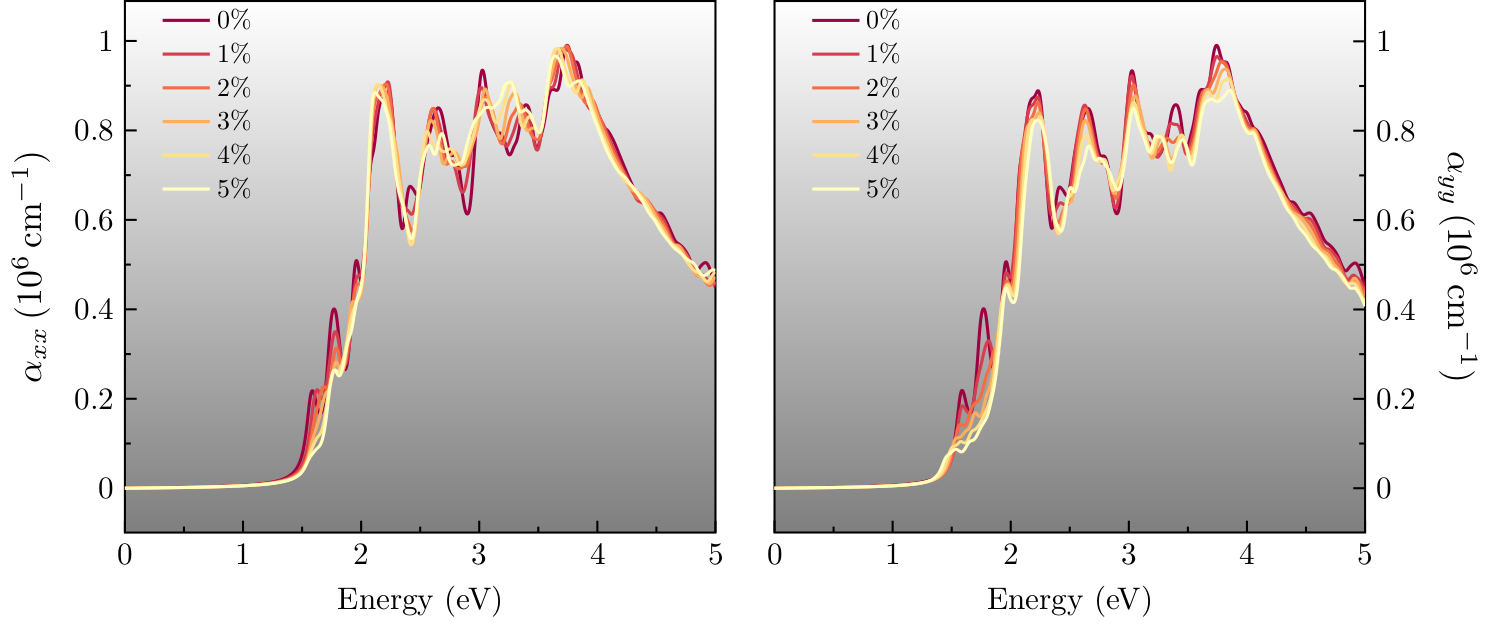

In [18]:
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{compat=1.16}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colormaps}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colorbrewer}")
push!(PGFPlotsX.CUSTOM_PREAMBLE,raw"\pgfplotsset{
legend image code/.code={
\draw[mark repeat=2,mark phase=2]
plot coordinates {
(0cm,0cm)
(0.4cm,0cm)        %% default is (0.3cm,0cm)
(0.8cm,0cm)         %% default is (0.6cm,0cm)
};%
}
}");
tpabs = @pgf TikzPicture({ })
abs_tddft = @pgf GroupPlot(
{
group_style ={
group_size="2 by 1",
 "horizontal sep=10mm"},
"scale only axis",
"width=10.0cm", "height=9cm",
"xmin=0.0,xmax=5.0",
#"ymin=-0.0e6,ymax=1.1e7",
"major tick length = 2mm",
"minor tick length = 1mm",
"minor y tick num=1",
"minor x tick num=1",
"xtick distance=1.0",
"ylabel style={scale=1.5}",
"xlabel style={scale=1.5}",
"every axis plot/.style={smooth,no marks,line width=1.5pt}",
"every axis/.append style={line width=1pt,tick style = {line width=1pt,black},ticklabel style={scale=1.5}}",
"axis line style={line width=1pt,line cap=round}",
"ytick pos=left",
"xtick pos=left",
"legend columns=6",
"transpose legend",
"legend style={
                cells={anchor=center},
                inner xsep=3pt,
                inner ysep=1pt,
                nodes={scale=1.25},
                draw=none,
                fill=none,
                at={(0.05,1)},
anchor=north west
}",
"cycle list/Spectral-11",
"set layers",   
raw"/pgfplots/ytick scale label code/.code={}",
},
{
"ytick pos=left",
"ylabel"=latexstring("\\alpha_{xx}\\,(10^{6}\\, \\mathrm{cm}^{-1})"),
"ylabel style={scale=1.15}",
"xlabel=Energy (eV)",
},
raw"\begin{pgfonlayer}{axis background}
    \fill[shade,bottom color=gray,top color=gray!0]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",
[Plot(Table("x"=>ax_b3lyp[1],"y"=>ax_b3lyp[i])) for i in 2:length(ax_b3lyp)],
[LegendEntry(latexstring("$(i)\\%") ) for i in [0,1,2,3,4,5]],
# Plot({"forget plot,densely dashed"},Coordinates([(1.40,-0.1e8),(1.40,1.2e8)])),

#------------------------------------------------------------------------------------------------------------
{
"ytick pos=right",
"ylabel"=latexstring("\\alpha_{yy}\\,(10^{6}\\, \\mathrm{cm}^{-1})"),
"ylabel style={scale=1.15,at={(rel axis cs:1.1,0.5)},rotate=180}",
"xlabel=Energy (eV)",
},
raw"\begin{pgfonlayer}{axis background}
    \fill[shade,bottom color=gray,top color=gray!0]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",
[Plot(Table("x"=>ay_b3lyp[1],"y"=>ay_b3lyp[i])) for i in 2:length(ax_b3lyp)],
[LegendEntry(latexstring("$(i)\\%") ) for i in [0,1,2,3,4,5]],
# Plot({"forget plot,densely dashed"},Coordinates([(1.40,-0.1e8),(1.40,1.2e8)])),

)

push!(tpabs,abs_tddft)
# push!(tpabs,abs_rpa)
display("image/png", tpabs)
# pgfsave("plots/abs-tddft_b3lyp.pdf",tpabs)

In [ ]:

tpabs = @pgf TikzPicture({ })
abs_tddft = @pgf GroupPlot(
{
group_style ={
group_size="2 by 1",
 "horizontal sep=10mm"},
"scale only axis",
"width=10.0cm", "height=9cm",
"xmin=0.0,xmax=5.0",
"ymin=0.0e6,ymax=1.0e6",
"major tick length = 2mm",
"minor tick length = 1mm",
"minor y tick num=1",
"minor x tick num=1",
"xtick distance=1.0",
"ytick distance=0.2",
"ylabel style={scale=1.5}",
"xlabel style={scale=1.5}",
"every axis plot/.style={smooth,no marks,line width=1.5pt}",
"every axis/.append style={line width=1pt,tick style = {line width=1pt,black},ticklabel style={scale=1.5}}",
"axis line style={line width=1pt,line cap=round}",
"ytick pos=left",
"xtick pos=left",
"legend columns=6",
"transpose legend",
"legend style={
                cells={anchor=center},
                inner xsep=3pt,
                inner ysep=1pt,
                nodes={scale=1.25},
                draw=none,
                fill=none,
                at={(0.05,1)},
anchor=north west
}",
"cycle list/Spectral-11",
"set layers",   
raw"/pgfplots/ytick scale label code/.code={}",
},
{
"ytick pos=left",
"ylabel"=latexstring("\\alpha_{xx}\\,(10^{6}\\, \\mathrm{cm}^{-1})"),
"ylabel style={scale=1.15}",
"xlabel=Energy (eV)",
},
raw"\begin{pgfonlayer}{axis background}
    \fill[shade,bottom color=gray,top color=gray!0]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",
[Plot(Table("x"=>ax_gaup[1],"y"=>ax_gaup[i])) for i in 2:length(ax_gaup)],
[LegendEntry(latexstring("$(i)\\%") ) for i in [0,1,2,3,4,5]],

#------------------------------------------------------------------------------------------------------------
{
"ytick pos=right",
"ylabel"=latexstring("\\alpha_{yy}\\,(10^{6}\\, \\mathrm{cm}^{-1})"),
"ylabel style={scale=1.15,at={(rel axis cs:1.1,0.5)},rotate=180}",
"xlabel=Energy (eV)",
},
raw"\begin{pgfonlayer}{axis background}
    \fill[shade,bottom color=gray,top color=gray!0]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",
[Plot(Table("x"=>ay_gaup[1],"y"=>ay_gaup[i])) for i in 2:length(ax_gaup)],
[LegendEntry(latexstring("$(i)\\%") ) for i in [0,1,2,3,4,5]],

)

push!(tpabs,abs_tddft)
# push!(tpabs,abs_rpa)

display("image/png", tpabs)
# pgfsave("plots/abs-tddft_gaup.pdf",tpabs)

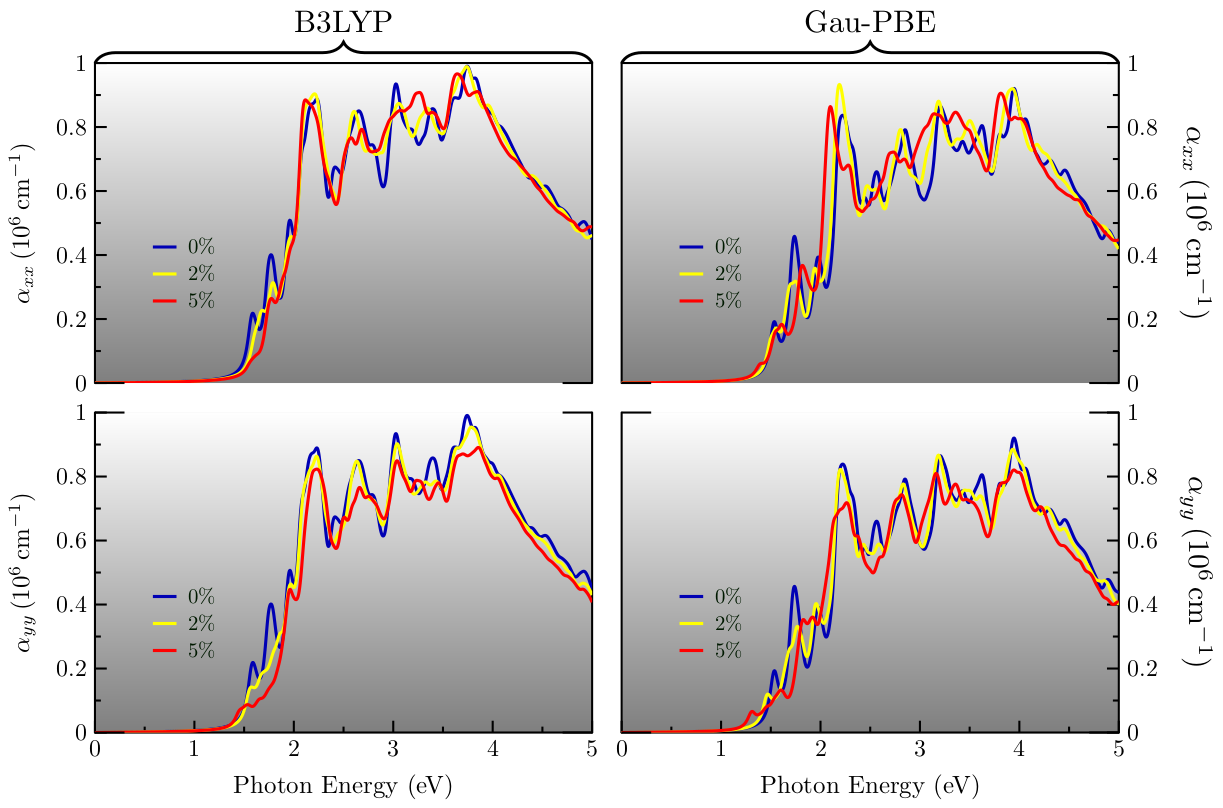

In [11]:
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colorbrewer}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{compat=1.16}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colormaps}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{colormap/GnBu-7} ")
push!(PGFPlotsX.CUSTOM_PREAMBLE,raw"\pgfplotsset{
legend image code/.code={
\draw[mark repeat=2,mark phase=2]
plot coordinates {
(0cm,0cm)
(0.1cm,0cm)        %% default is (0.4cm,0cm)
(0.4cm,0cm)        %% default is (0.8cm,0cm)
};%
}
}")
push!(PGFPlotsX.CUSTOM_PREAMBLE,raw"\pgfplotsset{
colormap={jet}{
rgb255(0cm)=(0,0,180); rgb255(1cm)=(0,255,255); rgb255(2cm)=(100,255,0);
rgb255(3cm)=(255,255,0); rgb255(4cm)=(255,0,0); rgb255(5cm)=(128,0,0)}
}")

tp = @pgf TikzPicture({ })
@pgf abs = GroupPlot(
    {
        group_style =
        {
            group_size="2 by 2",
            "vertical sep=5mm",
            "horizontal sep=5mm",
            "xticklabels at=edge bottom",
            },
        #"scale only axis",
        "width=10.0cm", "height=7.0cm",
        xmin=0.0,xmax=5.0,
        "ymin=0e6,ymax=1.0e6",
        "major tick length = 2mm",
        "minor tick length = 1mm",
        "minor x tick num=1",
        "minor y tick num=1",
        "xtick distance=1.0",
        "ylabel style={scale=1.2,at={(rel axis cs:-0.1,0.5)}}",
        "xlabel style={scale=1.2}",
        "every axis plot/.style={smooth,no marks,line width=1.5pt}",
        "every axis/.append style={line width=1.0pt,tick style = {line width=1pt,black},ticklabel style={scale=1.15}}",
        "axis line style={line width=1pt,line cap=round}",
        "ytick pos=left",
        "ytick pos=left",
        "y tick style={line width=1pt}",
        "legend columns=6",
        "transpose legend",
        "legend style={
          cells={anchor=west},
          nodes={scale=1},
          draw=none,
          fill=none,
          at={(rel axis cs:0.1,0.2)},
          anchor=south west}",
        "legend style={color=green!10!black,column sep=1mm}",
        "set layers",   
        "colormap name=jet",
        "cycle list={[colors of colormap={0,600,800} of jet]}",
        raw"/pgfplots/ytick scale label code/.code={}",
        },
    #-----------------------------------------------------alpha x---------------------------------------------------------
    {  
"ylabel"=latexstring("\\alpha_{xx}\\,(10^{6}\\, \\mathrm{cm}^{-1})"),
"axis x line*=top",
"xtick=\\empty",
raw"after end axis/.code={
            \draw (rel axis cs:0,0) +(0mm,0mm) -- +(5mm,0mm);
            \draw (rel axis cs:1,0) +(0mm,0mm) -- +(-5mm,0mm);
            },",   
},
raw"\begin{pgfonlayer}{axis background}
\fill[shade,bottom color=gray,top color=gray!0]
(rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
\end{pgfonlayer} ",
[Plot(Table("x"=>ax_b3lyp[1],"y"=>ax_b3lyp[i])) for i in [2,4,7]],
[LegendEntry(latexstring("$(i)\\%") ) for i in  [0,2,5]],

{  
"axis x line*=top",
"xtick=\\empty",
"ytick pos=right",
"ylabel"=latexstring("\\alpha_{xx}\\,(10^{6}\\, \\mathrm{cm}^{-1})"),
"ylabel style={scale=1.2,at={(rel axis cs:1.1,0.5)},rotate=180}",
raw"after end axis/.code={
            \draw (rel axis cs:0,0) +(0mm,0mm) -- +(5mm,0mm);
            \draw (rel axis cs:1,0) +(0mm,0mm) -- +(-5mm,0mm);
            },",    
},
  raw"\begin{pgfonlayer}{axis background}
  \fill[shade,bottom color=gray,top color=gray!0]
    (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
  \end{pgfonlayer} ",

[Plot(Table("x"=>ax_gaup[1],"y"=>ax_gaup[i])) for i in [2,4,7]],
[LegendEntry(latexstring("$(i)\\%") ) for i in [0,2,5]],

    #-------------------------------------------------------------------------------------------------------------------

    {
"xlabel={Photon Energy (eV)}",
"axis x line*=bottom", 
"ylabel"=latexstring("\\alpha_{yy}\\,(10^{6}\\, \\mathrm{cm}^{-1})"),
raw"after end axis/.code={
\draw (rel axis cs:0,0) +(0mm,0mm) -- +(5mm,0mm);
\draw (rel axis cs:1,0) +(0mm,0mm) -- +(-5mm,0mm);
\draw (rel axis cs:0,1) +(0mm,0mm) -- +(5mm,0mm);
\draw (rel axis cs:1,1) +(0mm,0mm) -- +(-5mm,0mm);
},",  
    },
    raw"\begin{pgfonlayer}{axis background}
    \fill[shade,bottom color=gray,top color=gray!0,draw=white]
      (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
    \end{pgfonlayer} ",

[Plot(Table("x"=>ay_b3lyp[1],"y"=>ay_b3lyp[i])) for i in [2,4,7]],
[LegendEntry(latexstring("$(i)\\%") ) for i in [0,2,5]],

    #---------------------------------------------- ------------------------------------------------------
{
"xlabel={Photon Energy (eV)}",
"axis x line*=bottom",        
"ytick pos=right",
"ylabel"=latexstring("\\alpha_{yy}\\,(10^{6}\\, \\mathrm{cm}^{-1})"),
"ylabel style={scale=1.2,at={(rel axis cs:1.1,0.5)},rotate=180}",
raw"after end axis/.code={
              \draw (rel axis cs:0,0) +(0mm,0mm) -- +(5mm,0mm);
              \draw (rel axis cs:1,0) +(0mm,0mm) -- +(-5mm,0mm);
              \draw (rel axis cs:0,1) +(0mm,0mm) -- +(5mm,0mm);
              \draw (rel axis cs:1,1) +(0mm,0mm) -- +(-5mm,0mm);
              },",   
 
  },
raw"\begin{pgfonlayer}{axis background}
\fill[shade,bottom color=gray,top color=gray!0,draw=white]
  (rel axis cs:0,0)--(rel axis cs:1,0)--(rel axis cs:1,1)--(rel axis cs:0,1)--cycle;
\end{pgfonlayer} ",
[Plot(Table("x"=>ay_gaup[1],"y"=>ay_gaup[i])) for i in [2,4,7]],
[LegendEntry(latexstring("$(i)\\%") ) for i in [0,2,5]],

#---------------------------------------------- ------------------------------------------------------
)

push!(tp,abs)
push!(tp,raw"\draw[decorate,decoration={brace,amplitude=10pt},line width=0.5mm](group c1r1.north west) -- (group c1r1.north east) node [midway,xshift=0.0,yshift=7mm,scale=1.5] {B3LYP};")
push!(tp,raw"\draw[decorate,decoration={brace,amplitude=10pt},line width=0.5mm](group c2r1.north west) -- (group c2r1.north east) node [midway,xshift=0.0,yshift=7mm,scale=1.5] {Gau-PBE};")
display("image/png", tp)
pgfsave("../Manuscript_images/fig-6.pdf",tp)


# Comparison BSE, RPA, TDDFT

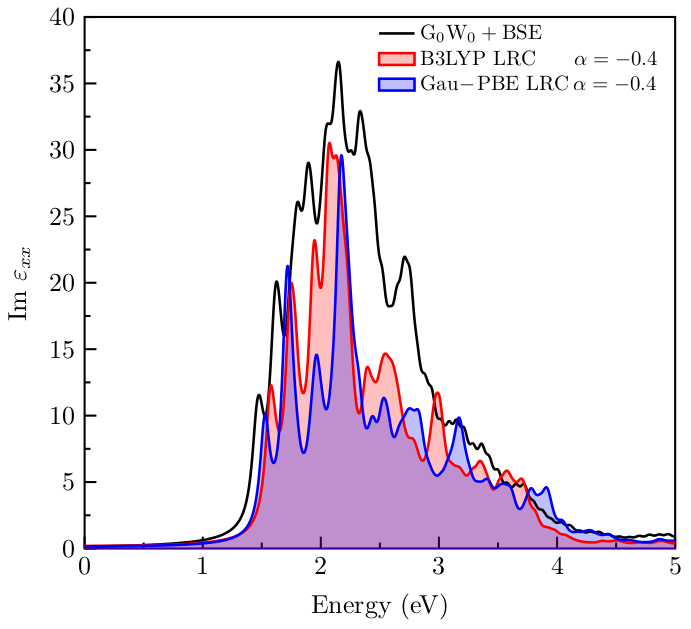

In [15]:
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{compat=1.16}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colormaps}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colorbrewer}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{fillbetween}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usetikzlibrary{patterns}")

epsx_tddft_b3lyp = np.loadtxt("../YAMBO/count-2/TDDFT-LRC/B3LYP/eps-b3lyp-0.0/ox-eps-b3lyp-0.0_out/o-ox-eps-b3lyp-0.0_run.eps_q1_inv_LRC_dyson")
epsx_tddft_gaup = np.loadtxt("../YAMBO/count-2/TDDFT-LRC/Gau-PBE/calc-4/eps-gaup-0.0/ox-eps-gaup-0.0_out/o-ox-eps-gaup-0.0_run.eps_q1_inv_LRC_dyson")
epsx_rpa = np.loadtxt("../YAMBO/count-2/RPA/rpa_qp_2_out/o-rpa_qp_2_run.eps_q1_inv_rpa_dyson")
epsx_bse = np.loadtxt("../YAMBO/count-1/BSE/bse-eps-outputs/o-bse_7_run.eps_q1_haydock_bse")


push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{compat=1.16}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colormaps}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colorbrewer}")
push!(PGFPlotsX.CUSTOM_PREAMBLE,
raw"\pgfplotsset{
            legend image code/.code={
            \draw[mark repeat=2,mark phase=2]
            plot coordinates {
            (0cm,0cm)
            (0.2cm,0cm)        %% default is (0.3cm,0cm)
            (0.6cm,0cm)        %% default is (0.6cm,0cm)
            };%
            }}
");

tax = @pgf TikzPicture({ })
aax = @pgf Axis(
{"name=pa",
"scale only axis",
"width=10.0cm", "height=9.0cm",
"xmin=0.0,xmax=5.0",
"ymin=-0.0,ymax=40.0",
"major tick length = 2mm",
"minor tick length = 1mm",
"minor x tick num=1",
"minor y tick num=1",
"xtick distance=1.0",
"ylabel style={scale=1.25}",
"xlabel style={scale=1.25}",
"xlabel = {Energy (eV)}",
raw"ylabel = {Im $\varepsilon_{xx}$}",
"every axis plot/.style={smooth,no marks,line width=1.25pt}",
"every axis/.append style={line width=1.5pt,tick style = {line width=1pt,black},ticklabel style={scale=1.25}}",
"axis line style={line width=1pt,line cap=round}",
"ytick pos=left",
"xtick pos=left",
"legend style={
                cells={anchor=west},
                inner xsep=3pt,
                inner ysep=1pt,
                nodes={scale=1},
                draw=none,
                fill=none,
                at={(rel axis cs: 0.99,1)},
                anchor=north east
}",
},
Plot({"color=black"},Table("x"=>epsx_bse[:,1],"y"=>epsx_bse[:,2])),
LegendEntry(L"\mathrm{G_{0}W_{0}}+\mathrm{BSE}"),
# Plot({"color=blue"},Table("x"=>epsx_rpa[5][:,1],"y"=>epsx_rpa[5][:,2])),
# LegendEntry(L"\mathrm{G_{0}W_{0}}+\mathrm{RPA}"),
Plot({"name path=A,color=red,forget plot"},Table("x"=>epsx_tddft_b3lyp[:,1],"y"=>epsx_tddft_b3lyp[:,2])),
Plot({"name path=B,color=blue,forget plot"},Table("x"=>epsx_tddft_gaup[:,1],"y"=>epsx_tddft_gaup[:,2])),
Plot({"name path=C",forget_plot,no_marks,"opacity=0"},Coordinates([(0,0),(5,0)])),
Plot({"fill=red,fill opacity=0.25, draw=red"},raw"fill between [of=A and C]"),
LegendEntry(L"\mathrm{B3LYP\,\, LRC}\quad\quad\!\alpha=-0.4"),
Plot({"fill=blue,fill opacity=0.25, draw=blue"},raw"fill between [of=B and C]"),
LegendEntry(L"\mathrm{Gau\!-\!PBE\,\,LRC}\,\alpha=-0.4"),

)

push!(tax,aax)
#push!(tax,asoc)

display("image/png", tax)
# pgfsave("/media/rbnfiles/ruco/research/papers/Sb2Te3-2025/v3/graphical_abstract/images/ga.pdf",tax)

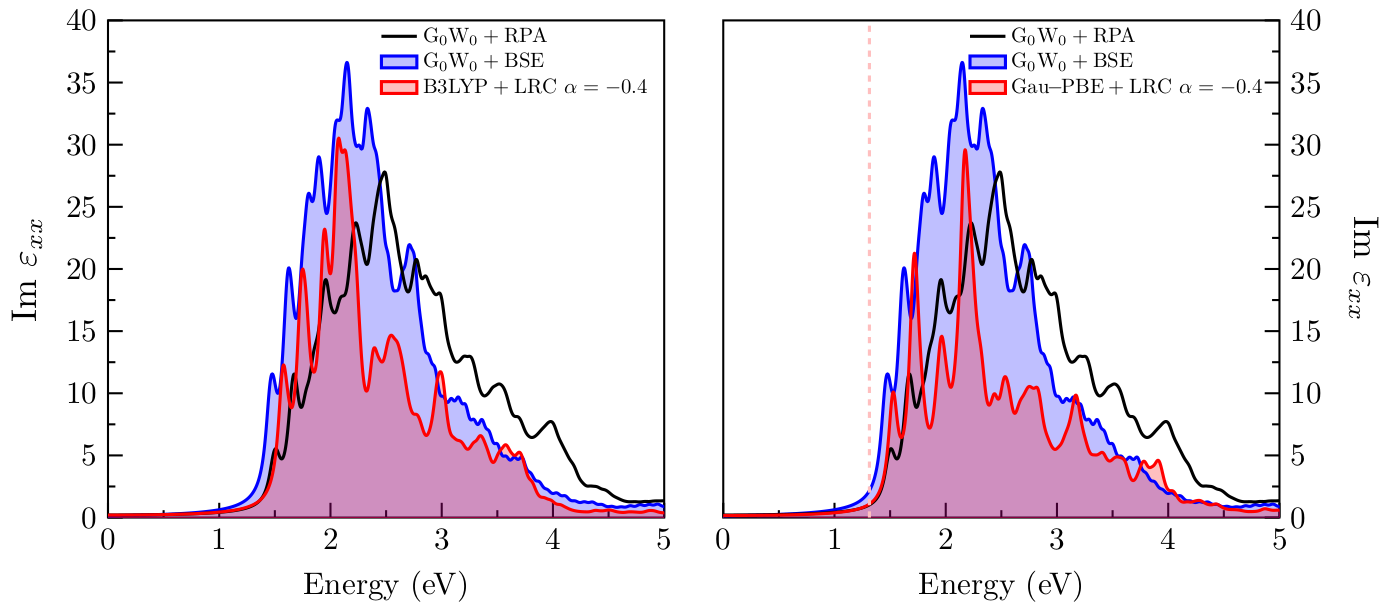

In [16]:

push!(PGFPlotsX.CUSTOM_PREAMBLE,raw"\pgfplotsset{
legend image code/.code={
\draw[mark repeat=2,mark phase=2]
plot coordinates {
(0cm,0cm)
(0.3cm,0cm)        
(0.6cm,0cm)       
};%
}
}");
tpabs = @pgf TikzPicture({ })
abs_tddft = @pgf GroupPlot(
{
group_style ={
group_size="2 by 1",
 "horizontal sep=10mm"},
# "scale only axis",
"width=11.0cm", "height=10cm",
"xmin=0.0,xmax=5.0",
"ymin=0,ymax=40",
"major tick length = 2.5mm",
"minor tick length = 1.25mm",
"minor y tick num=1",
"minor x tick num=1",
"xtick distance=1.0",
"ylabel style={scale=1.5}",
"xlabel style={scale=1.5}",
"every axis plot/.style={smooth,no marks,line width=1.5pt}",
"every axis/.append style={line width=1pt,tick style = {line width=1pt,black},ticklabel style={scale=1.5}}",
"axis line style={line width=1pt,line cap=round}",
"ytick pos=left",
"xtick pos=left",
"legend columns=6",
"transpose legend",
"legend style={
                cells={anchor=west},
                inner xsep=3pt,
                inner ysep=1pt,
                nodes={scale=1.0},
                draw=none,
                fill=none,
                at={(rel axis cs:0.99,1)},
                anchor=north east}",
raw"/pgfplots/ytick scale label code/.code={}",
},
{
"ytick pos=left",
raw"ylabel = {Im $\varepsilon_{xx}$}",
"ylabel style={scale=1.15}",
"xlabel=Energy (eV)",
},
Plot({"name path=P,color=blue",forget_plot},Table("x"=>epsx_bse[:,1],"y"=>epsx_bse[:,2])),
Plot({"color=black"},Table("x"=>epsx_rpa[:,1],"y"=>epsx_rpa[:,2])),
LegendEntry(L"\mathrm{G_{0}W_{0}}+\mathrm{RPA}"),
Plot({"name path=A,color=red",forget_plot},Table("x"=>epsx_tddft_b3lyp[:,1],"y"=>epsx_tddft_b3lyp[:,2])),
Plot({"name path=B",forget_plot,no_marks,"opacity=0"},Coordinates([(0,0),(5,0)])),
Plot({"fill=blue,fill opacity=0.25,draw=blue"},raw"fill between [of=P and B]"),
LegendEntry(L"\mathrm{G_{0}W_{0}}+\mathrm{BSE}"),
Plot({"fill=red,fill opacity=0.25,draw=red"},raw"fill between [of=A and B]"),
LegendEntry(L"\mathrm{B3LYP+LRC\,\,\alpha=-0.4}"),
#------------------------------------------------------------------------------------------------------------
{
"ytick pos=right",
raw"ylabel = {Im $\varepsilon_{xx}$}",
"ylabel style={scale=1.15,at={(rel axis cs:1.1,0.5)},rotate=180}",
"xlabel=Energy (eV)",
},
Plot({"name path=P,color=blue",forget_plot},Table("x"=>epsx_bse[:,1],"y"=>epsx_bse[:,2])),
Plot({"color=black"},Table("x"=>epsx_rpa[:,1],"y"=>epsx_rpa[:,2])),
LegendEntry(L"\mathrm{G_{0}W_{0}}+\mathrm{RPA}"),
Plot({"name path=A,color=red",forget_plot},Table("x"=>epsx_tddft_gaup[:,1],"y"=>epsx_tddft_gaup[:,2])),
Plot({"name path=B",forget_plot,no_marks,"opacity=0"},Coordinates([(0,0),(5,0)])),
Plot({"fill=blue,fill opacity=0.25, draw=blue"},raw"fill between [of=P and B]"),
LegendEntry(L"\mathrm{G_{0}W_{0}}+\mathrm{BSE}"),
Plot({"fill=red,fill opacity=0.25, draw=red"},raw"fill between [of=A and B]"),
LegendEntry(L"\mathrm{Gau\!\!-\!\!PBE+LRC\,\,\alpha=-0.4}"),
Plot({forget_plot,pink,no_marks,dashed},Coordinates([1.314,1.314],[0,40])),
# Plot({forget_plot, no_marks,dashed},Coordinates([1.20,1.20],[0,40])),

)

push!(tpabs,abs_tddft)
display("image/png", tpabs)
pgfsave("../Manuscript_images/fig-4.pdf",tp)
